In [ ]:
!pip install finance-datareader
!pip install pykrx
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 12.3 MB/s eta 0:00:00


In [ ]:
# 주가 정보 수집
import FinanceDataReader as fdr

In [ ]:
import pandas as pd

In [ ]:
df_kospi = fdr.DataReader('KS11', '2020-01-01','2023-06-30')
df_kospi.reset_index(inplace=True)
df_kosdaq = fdr.DataReader('KQ11', '2020-01-01','2023-06-30')
df_kosdaq.reset_index(inplace=True)
df_exr = fdr.DataReader('USD/JPY', '2020-01-01','2023-06-30')
df_exr.reset_index(inplace=True)
df_gold = fdr.DataReader('ZG', '2020-01-01','2023-06-30')
df_gold.reset_index(inplace=True)
df_jpy = fdr.DataReader('JPY/KRW', '2020-01-01','2023-06-30')
df_jpy.reset_index(inplace=True)

In [ ]:
df_ex_kp_kd = pd.merge(df_kospi[['Close','Date']],df_kosdaq[['Close','Date']] ,on = 'Date')
df_ex_kp_kd = pd.merge(df_ex_kp_kd,df_exr[['Close','Date']], on = 'Date')
df_ex_kp_kd = pd.merge(df_ex_kp_kd,df_gold[['Close','Date']], on = 'Date')
df_ex_kp_kd = pd.merge(df_ex_kp_kd,df_jpy[['Close','Date']], on = 'Date')
df_ex_kp_kd.set_index('Date', inplace = True)

<ipython-input-7-2783d5aa4f5d>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_ex_kp_kd = pd.merge(df_ex_kp_kd,df_gold[['Close','Date']], on = 'Date')


In [ ]:
df_ex_kp_kd.columns = ['KOSPI','KOSDAQ','USD/JPY','Gold','JPY/KRW']
df_ex_kp_kd

,KOSPI,KOSDAQ,USD/JPY,Gold,JPY/KRW
Date,,,,,
2020-01-02,2175.169922,674.020020,108.712997,45.000000,10.615074
2020-01-03,2176.459961,669.929993,108.542999,44.560001,10.659966
2020-01-06,2155.070068,655.309998,107.963997,44.430000,10.798657
2020-01-07,2175.540039,663.440002,108.405998,45.480000,10.756629
2020-01-08,2151.310059,640.940002,108.015999,45.380001,10.797057
...,...,...,...,...,...
2023-06-23,2570.100098,874.840027,143.029999,46.959999,9.075821
2023-06-26,2582.199951,879.500000,143.541000,48.189999,9.110144
2023-06-27,2581.389893,874.140015,143.460007,49.980000,9.084294


In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_ex_kp_kd

mmx_scaler = MinMaxScaler()
df_scaled = mmx_scaler.fit_transform(df_scaled)

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['KOSPI','KOSDAQ','USD/JPY','Gold','JPY']
df_scaled.index = df_ex_kp_kd.index
df_scaled

,KOSPI,KOSDAQ,USD/JPY,Gold,JPY
Date,,,,,
2020-01-02,0.388364,0.388934,0.127058,0.119203,0.611307
2020-01-03,0.389062,0.382459,0.123479,0.116763,0.628420
2020-01-06,0.377485,0.359313,0.111289,0.116042,0.681289
2020-01-07,0.388564,0.372184,0.120595,0.121866,0.665268
2020-01-08,0.375450,0.336563,0.112384,0.121311,0.680679
...,...,...,...,...,...
2023-06-23,0.602121,0.706863,0.849552,0.130075,0.024547
2023-06-26,0.608670,0.714240,0.860310,0.136898,0.037631
2023-06-27,0.608231,0.705755,0.858605,0.146827,0.027777


In [ ]:
df_airbu = fdr.DataReader('298690', '2020-01-01','2023-06-30')
df_airbu.reset_index(inplace=True)
df_hanatour = fdr.DataReader('039130', '2020-01-01','2023-06-30')
df_hanatour.reset_index(inplace=True)

df_tour = pd.merge(df_airbu[['Close','Date']],df_hanatour[['Close','Date']] ,on = 'Date')
df_tour = pd.merge(df_tour,df_jpy[['Close','Date']], on = 'Date')
df_tour.set_index('Date', inplace = True)

df_tour.columns = ['Airbusan','Hanatour','JPY/KRW']
df_tour

,Airbusan,Hanatour,JPY/KRW
Date,,,
2020-01-02,11350,51577,10.615074
2020-01-03,11488,51577,10.659966
2020-01-06,10975,49428,10.798657
2020-01-07,10816,50210,10.756629
2020-01-08,10224,49037,10.797057
...,...,...,...
2023-06-26,3285,51800,9.110144
2023-06-27,3240,51500,9.084294
2023-06-28,3345,51700,9.011426


In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_tour

mmx_scaler = MinMaxScaler()
df_scaled = mmx_scaler.fit_transform(df_scaled)

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Airbusan','Hanatour','JPY/KRW']
df_scaled.index = df_tour.index
df_scaled

,Airbusan,Hanatour,JPY/KRW
Date,,,
2020-01-02,0.985532,0.385804,0.613549
2020-01-03,1.000000,0.385804,0.630563
2020-01-06,0.946215,0.351854,0.683127
2020-01-07,0.929545,0.364208,0.667198
2020-01-08,0.867477,0.345677,0.682521
...,...,...,...
2023-06-26,0.139966,0.389327,0.043182
2023-06-27,0.135248,0.384587,0.033385
2023-06-28,0.146257,0.387747,0.005768


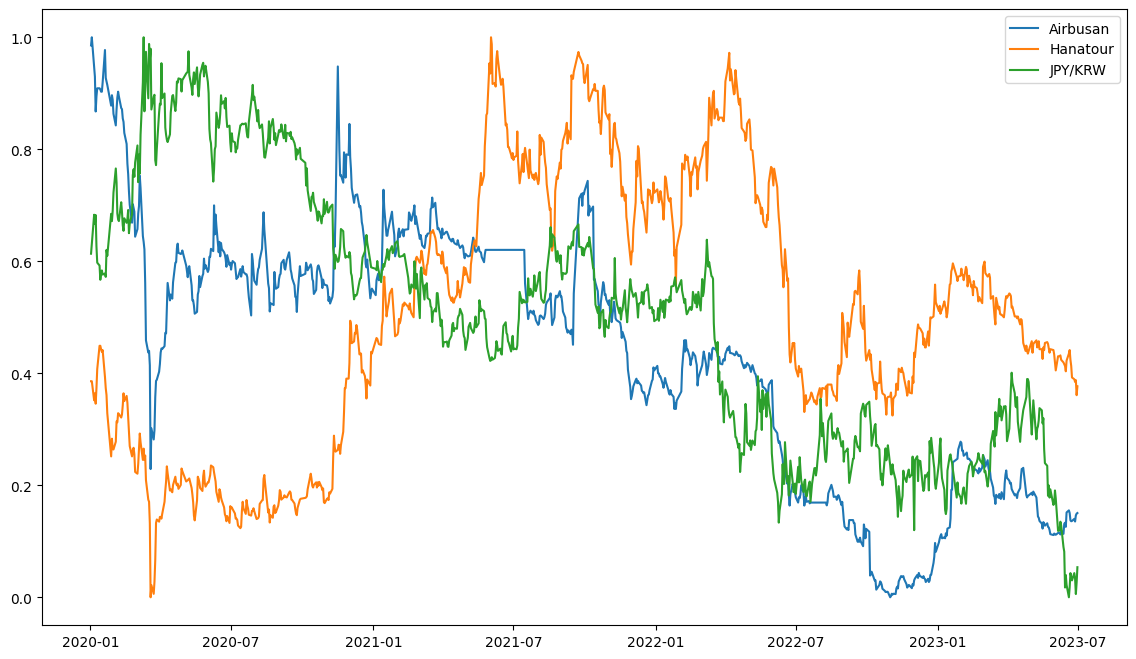

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,8))
plt.plot(df_scaled['Airbusan'], label = 'Airbusan')
plt.plot(df_scaled['Hanatour'], label = 'Hanatour')
plt.plot(df_scaled['JPY/KRW'], label = 'JPY/KRW')
plt.legend()
plt.show()

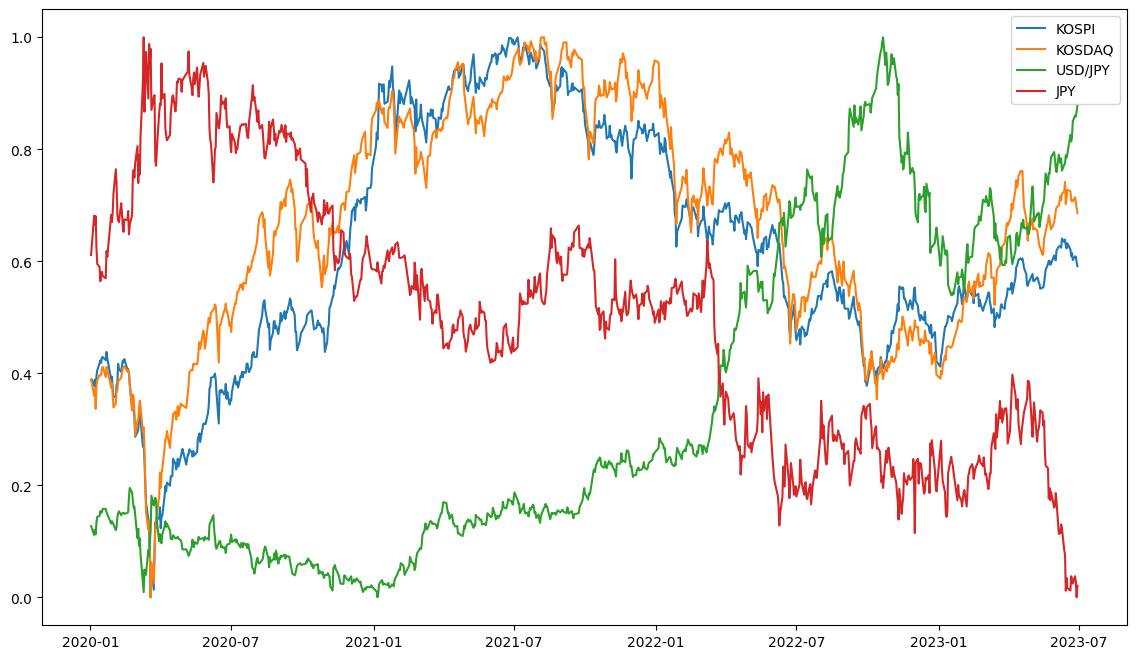

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,8))
plt.plot(df_scaled['KOSPI'], label = 'KOSPI')
plt.plot(df_scaled['KOSDAQ'], label = 'KOSDAQ')
plt.plot(df_scaled['USD/JPY'], label = 'USD/JPY')
# plt.plot(df_scaled['Gold'], label = 'Gold')
plt.plot(df_scaled['JPY'], label = 'JPY')
plt.legend()
plt.show()

In [ ]:
symbols_list = df_nsdq['Symbol']

In [ ]:
import pandas as pd

In [ ]:
for symbols in symbols_list:
    df_one = fdr.DataReader(symbols, '2019-01-01','2021-01-01')
    df_aapl = pd.concat(df_aapl, df_one)

SyntaxError: ignored

In [ ]:
df_ss = fdr.DataReader('005930', '2020-01-01','2023-06-30')
df_ss

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2023-06-26,71700,72500,71500,72400,10541901,0.011173
2023-06-27,72500,72600,72000,72600,9442997,0.002762
2023-06-28,72600,72700,72000,72700,8783093,0.001377


In [ ]:
OBV = []
OBV.append(0)
for i in range(1, len(df_ss.Close)):
    if df_ss.Close[i] > df_ss.Close[i-1]:
        OBV.append(OBV[-1] + df_ss.Volume[i])
    elif df_ss.Close[i] < df_ss.Close[i-1]:
        OBV.append(OBV[-1] - df_ss.Volume[i])
    else:
        OBV.append(OBV[-1])

In [ ]:
df_ss['OBV'] = OBV

df_ss['OBV_EMA'] = df_ss['OBV'].ewm(com=20).mean()

df_ss

,Open,High,Low,Close,Volume,Change,OBV,OBV_EMA
Date,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,0,0.000000e+00
2020-01-03,56000,56600,54900,55500,15422255,0.005435,15422255,7.899204e+06
2020-01-06,54900,55600,54600,55500,10278951,0.000000,15422255,1.053018e+07
2020-01-07,55700,56400,55600,55800,10009778,0.005405,25432033,1.453256e+07
2020-01-08,56200,57400,55900,56800,23501171,0.017921,48933204,2.209988e+07
...,...,...,...,...,...,...,...,...
2023-06-26,71700,72500,71500,72400,10541901,0.011173,-123503673,-1.610106e+08
2023-06-27,72500,72600,72000,72600,9442997,0.002762,-114060676,-1.587749e+08
2023-06-28,72600,72700,72000,72700,8783093,0.001377,-105277583,-1.562274e+08


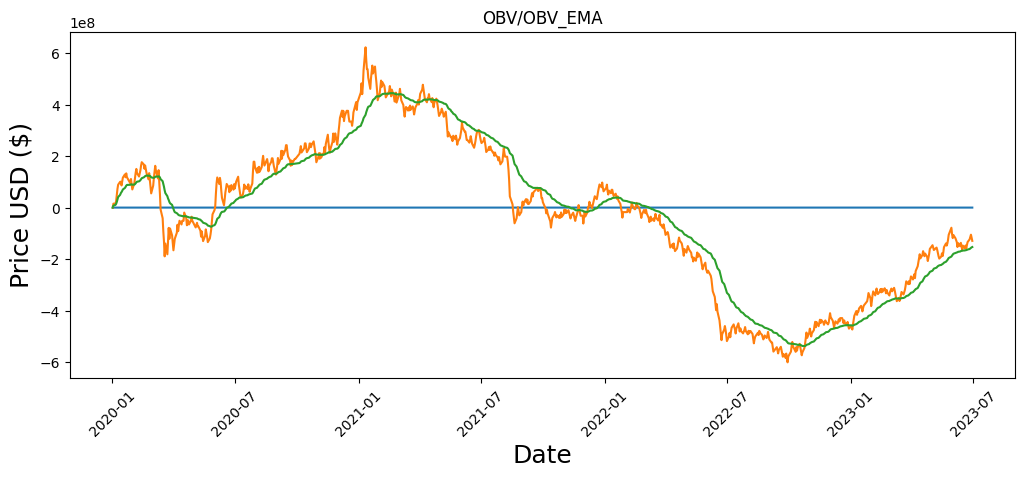

In [ ]:
plt.figure(figsize = (12.2,4.5))
plt.plot(df_ss['Close'], label = 'OBV')
plt.plot(df_ss['OBV'], label = 'OBV')
plt.plot(df_ss['OBV_EMA'], label = 'OBV_EMA')
plt.xticks(rotation = 45)
plt.title('OBV/OBV_EMA')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Price USD ($)', fontsize = 18)
plt.show()